## Create Linear Dataset

In [48]:
from sklearn.datasets import make_classification

random_seed = 20

X, y = make_classification(n_samples=400, 
                           n_features=2, 
                           n_informative=1,
                           n_redundant=0, 
                           n_classes=2,
                           class_sep=.4, 
                           n_clusters_per_class=1,
                           random_state=random_seed,
                           weights=(0.1, 0.9))

print(X.shape)
print(y.shape)

(400, 2)
(400,)


## Define Helper Functions

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(classifier, X_display, y_display, ax):

    x1, x2 = np.meshgrid(
        np.linspace(-6, 6, 400),
        np.linspace(-6, 6, 400)
    )

    grid = np.vstack([x1.ravel(), x2.ravel()]).T
    y_pred = np.reshape(classifier.predict(grid), x1.shape)

    display = DecisionBoundaryDisplay(
        xx0=x1, xx1=x2, response=y_pred
    )
    
    display.plot(ax=ax)

    ax.scatter(X_display[:, 0], X_display[:, 1], c=y_display, edgecolor="white")

## Define Training and Test Sets

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 2)
(320,)
(80, 2)
(80,)


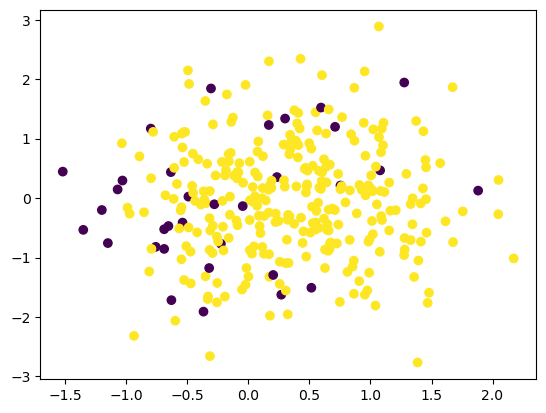

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

## Things to do:

* Define a Pipeline
    * Standard Scaler
    * Logistic Regression

* Train the model with training set
* Plot training set and decision boundary
* Print score with training set
* Print score with test set
* Plot test set and decision boundary

#### Create Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

#### Train the model

In [53]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

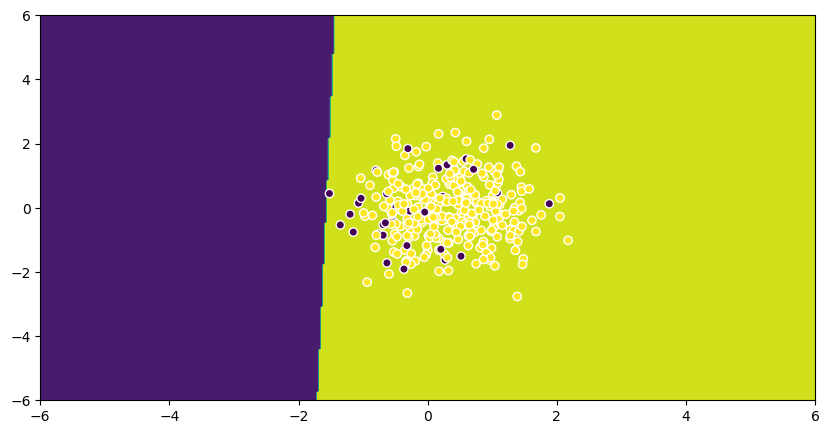

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot_decision_boundary(classifier_pipeline, X_train, y_train, ax)

In [55]:
classifier_pipeline.score(X_train, y_train)

0.896875

In [56]:
classifier_pipeline.score(X_test, y_test)

0.9125

## Random Oversampling

#### Count the number of samples of each class

In [57]:
X_train_zeros = X_train[y_train == 0, :]
X_train_ones = X_train[y_train == 1, :]

print(X_train_zeros.shape)
print(X_train_ones.shape)

(33, 2)
(287, 2)


#### Compute the difference in size of both classes

In [58]:
delta = np.abs(X_train_zeros.shape[0] - X_train_ones.shape[0])
delta

254

#### Generate duplicate of the minority class

In [59]:
np.random.seed(random_seed)
duplicate_index = np.random.choice(range(X_train_zeros.shape[0]), delta, replace=True, p=None)
duplicate_index

array([26, 15, 31, 28, 26,  9, 20, 11, 22,  7, 32, 21, 26, 26, 19, 16, 16,
        7,  6, 26, 13, 11, 25,  3, 10, 11, 13, 19, 30, 32, 10,  6, 11, 18,
        3, 13, 17, 16, 18, 15, 26,  7, 11, 29,  6, 14, 24, 18, 29, 14, 30,
        3, 18,  6, 22, 14,  4, 27, 11,  8,  6, 26, 15, 18, 14, 10, 21, 17,
       18, 20, 30,  8, 19, 31, 10,  9, 23, 32, 12, 14, 31, 17,  9, 27, 23,
        9, 14, 31, 15, 27, 10,  5,  2, 23, 31, 25,  9,  2, 15,  1, 30, 24,
       11,  5,  0, 22,  4, 18,  9, 14, 11, 23, 29,  2, 19, 22, 21, 20, 20,
       24, 11,  1, 18, 12, 10, 32, 31, 21, 31,  3, 12,  2, 32, 22, 15,  7,
       11, 21, 27,  7, 23,  6, 12, 28,  6,  0,  7,  2, 26,  6, 11, 19, 11,
        6,  9, 22, 16, 16,  2, 23, 10, 27, 30,  1, 21,  5,  6,  4, 18, 10,
        0,  4, 11, 15, 11,  4, 22,  6,  9, 11, 18,  0,  0, 31, 28,  5, 26,
       15, 27, 10,  5, 17, 15, 21, 22,  7, 23, 13, 24, 30,  0,  4, 29, 13,
       27,  6, 32,  5, 29, 16,  7, 11, 23, 20, 21,  4,  6, 18, 32, 24, 20,
        8,  8, 29, 11, 19

In [60]:
X_train_zeros_2 = X_train_zeros[duplicate_index, :]
X_train_zeros_2.shape

(254, 2)

#### Attach the ducplicates into the training set

In [61]:
y_train_2 = np.vstack((y_train.reshape(-1, 1), np.zeros(delta).reshape(-1, 1)))
X_train_2 = np.vstack((X_train, X_train_zeros_2))

print(y_train_2.shape)
print(X_train_2.shape)

(574, 1)
(574, 2)


print(np.sum(y_train_2 == 0))
print(np.sum(y_train_2 == 1))

#### Train the model

In [62]:
classifier_pipeline_oversampling = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])


classifier_pipeline_oversampling.fit(X_train_2, y_train_2)

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got 'none' instead.

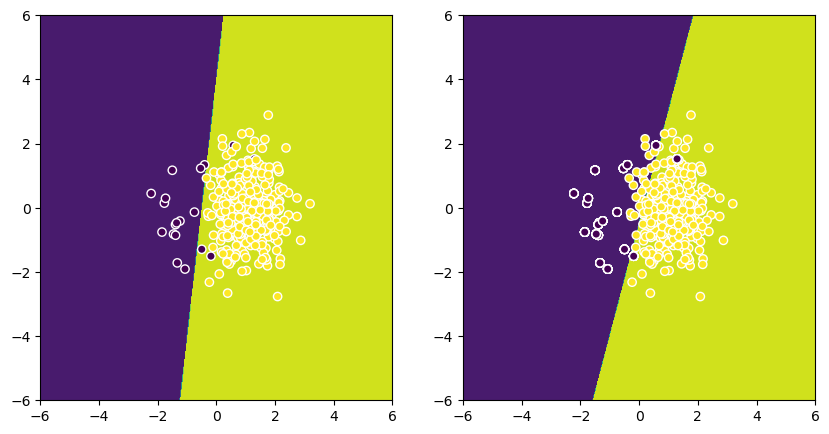

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_decision_boundary(classifier_pipeline, X_train, y_train, axs[0])
plot_decision_boundary(classifier_pipeline_oversampling, X_train_2, y_train_2, axs[1])

#### Print Metrics

In [17]:
print(classifier_pipeline.score(X_train, y_train))
print(classifier_pipeline.score(X_test, y_test))

0.9875
0.9625


In [18]:
print(classifier_pipeline_oversampling.score(X_train_2, y_train_2))
print(classifier_pipeline_oversampling.score(X_test, y_test))

0.9069767441860465
0.8875


In [19]:
from sklearn.metrics import recall_score, precision_score

print(recall_score(y_train, classifier_pipeline.predict(X_train)))
print(precision_score(y_train, classifier_pipeline.predict(X_train)))
print()
print(recall_score(y_test, classifier_pipeline.predict(X_test)))
print(precision_score(y_test, classifier_pipeline.predict(X_test)))

1.0
0.9868852459016394

0.9871794871794872
0.9746835443037974


In [20]:
from sklearn.metrics import recall_score

print(recall_score(y_train_2, classifier_pipeline_oversampling.predict(X_train_2)))
print(precision_score(y_train_2, classifier_pipeline_oversampling.predict(X_train_2)))
print()
print(recall_score(y_test, classifier_pipeline_oversampling.predict(X_test)))
print(precision_score(y_test, classifier_pipeline_oversampling.predict(X_test)))

0.9169435215946844
0.8990228013029316

0.8974358974358975
0.9859154929577465


## Plot ROC Curve

In [21]:
def plot_roc(fpr, tpr, ax):
    ax.plot(fpr, tpr, linewidth=2)
    ax.plot([0, 1], [0, 1], 'k--')                                  # Not shown in the book
    ax.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    ax.set_ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    ax.grid(True)
    #plt.show()

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, classifier_pipeline.decision_function(X_test))
fpr_os, tpr_os, thresholds_os = roc_curve(y_test, classifier_pipeline_oversampling.decision_function(X_test))

In [31]:
thresholds

array([13.87208677, 12.87208677,  3.66322421,  3.20157429,  1.03288964,
        0.36079592, -3.78398144])

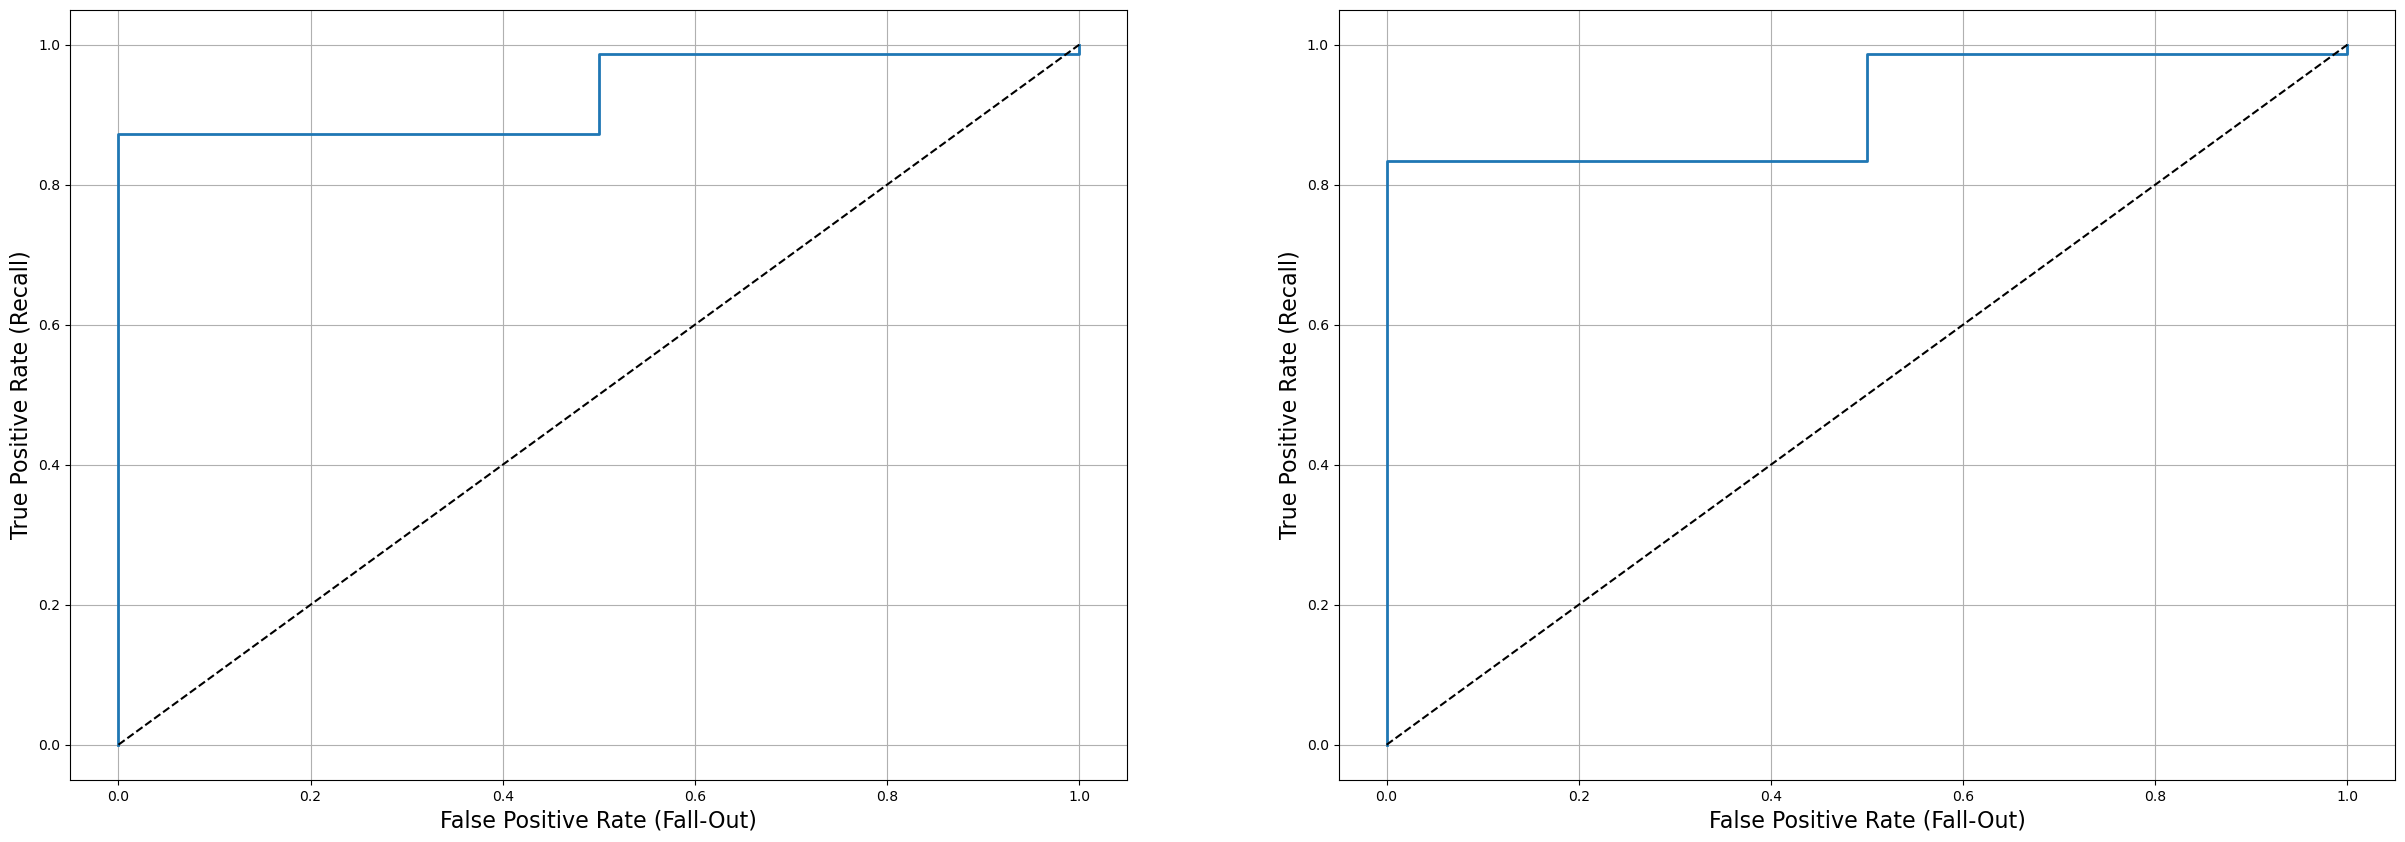

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plot_roc(fpr, tpr, axs[0])
plot_roc(fpr_os, tpr_os, axs[1])